In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk
import re
from collections import Counter
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
df = pd.read_csv("/content/spam.csv", encoding='latin-1')  # adjust path if needed
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    tokens = word_tokenize(text.lower())
    return [t for t in tokens if t.isalpha() and t not in stop_words]

def get_top_ngrams(corpus, ngram=1, top=10):
    tokens = []
    for text in corpus:
        tokens.extend([' '.join(gram) for gram in ngrams(clean_and_tokenize(text), ngram)])
    return Counter(tokens).most_common(top)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Top 10 unigrams (ham): [('u', 979), ('gt', 318), ('lt', 316), ('get', 301), ('go', 248), ('ok', 245), ('got', 242), ('ur', 237), ('know', 236), ('like', 231)]
Top 10 bigrams (ham): [('lt gt', 276), ('gon na', 58), ('call later', 50), ('let know', 39), ('sorry call', 38), ('r u', 37), ('u r', 35), ('good morning', 31), ('take care', 31), ('u wan', 29)]
Top 10 trigrams (ham): [('sorry call later', 38), ('lt decimal gt', 23), ('gt lt gt', 18), ('happy new year', 18), ('lt gt lt', 16), ('like lt gt', 14), ('pls send message', 13), ('cant pick phone', 12), ('pick phone right', 12), ('phone right pls', 12)]
Top 10 unigrams (spam): [('call', 346), ('free', 219), ('txt', 156), ('ur', 144), ('u', 141), ('mobile', 123), ('text', 121), ('stop', 114), ('claim', 113), ('reply', 104)]
Top 10 bigrams (spam): [('please call', 45), ('po box', 24), ('guaranteed call', 23), ('prize guaranteed', 22), ('call landline', 22), ('selected receive', 19), ('send stop', 19), ('every week', 19), ('await collection

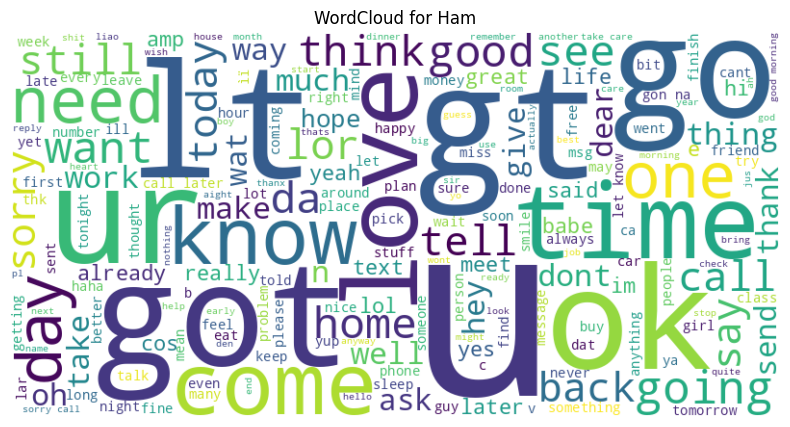

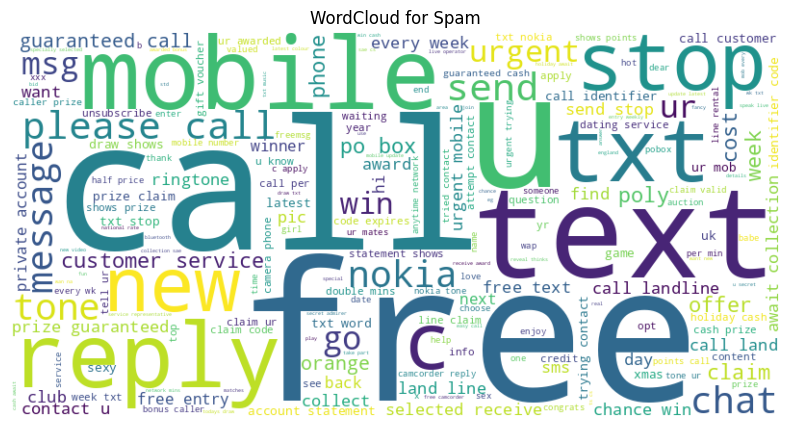

In [9]:
nltk.download('punkt_tab')

ham_texts = df[df['label'] == 0]['text']
spam_texts = df[df['label'] == 1]['text']

print("Top 10 unigrams (ham):", get_top_ngrams(ham_texts, 1))
print("Top 10 bigrams (ham):", get_top_ngrams(ham_texts, 2))
print("Top 10 trigrams (ham):", get_top_ngrams(ham_texts, 3))

print("Top 10 unigrams (spam):", get_top_ngrams(spam_texts, 1))
print("Top 10 bigrams (spam):", get_top_ngrams(spam_texts, 2))
print("Top 10 trigrams (spam):", get_top_ngrams(spam_texts, 3))

def plot_wordcloud(texts, title):
    all_words = ' '.join([' '.join(clean_and_tokenize(text)) for text in texts])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(ham_texts, 'WordCloud for Ham')
plot_wordcloud(spam_texts, 'WordCloud for Spam')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (4457, 7735)
Shape of X_test_bow: (1115, 7735)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model_bow = LogisticRegression()
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)
f1_bow = f1_score(y_test, y_pred_bow)

print("F1-score (Bag-of-Words):", f1_bow)

F1-score (Bag-of-Words): 0.9097472924187726


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (4457, 7735)
Shape of X_test_tfidf: (1115, 7735)


In [13]:
model_tfidf = LogisticRegression()
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)

print("F1-score (TF-IDF):", f1_tfidf)

F1-score (TF-IDF): 0.8646616541353384


In [14]:
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email IDs
    text = re.sub(r'\S+@\S+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words and lemmatize
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and t.isalpha()]

    # Join tokens back to string
    return ' '.join(processed_tokens)


In [15]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

X_train_cleaned, X_test_cleaned, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

vectorizer_tfidf_cleaned = TfidfVectorizer()
X_train_tfidf_cleaned = vectorizer_tfidf_cleaned.fit_transform(X_train_cleaned)
X_test_tfidf_cleaned = vectorizer_tfidf_cleaned.transform(X_test_cleaned)

print("Shape of X_train_tfidf_cleaned:", X_train_tfidf_cleaned.shape)
print("Shape of X_test_tfidf_cleaned:", X_test_tfidf_cleaned.shape)

Shape of X_train_tfidf_cleaned: (4457, 6925)
Shape of X_test_tfidf_cleaned: (1115, 6925)


In [16]:
model_tfidf_cleaned = LogisticRegression()
model_tfidf_cleaned.fit(X_train_tfidf_cleaned, y_train)
y_pred_tfidf_cleaned = model_tfidf_cleaned.predict(X_test_tfidf_cleaned)
f1_tfidf_cleaned = f1_score(y_test, y_pred_tfidf_cleaned)
print("F1-score (TF-IDF with preprocessing):", f1_tfidf_cleaned)

F1-score (TF-IDF with preprocessing): 0.7729083665338645


In [17]:
print("F1-score (Bag-of-Words):", f1_bow)
print("F1-score (TF-IDF):", f1_tfidf)
print("F1-score (TF-IDF with preprocessing):", f1_tfidf_cleaned)

F1-score (Bag-of-Words): 0.9097472924187726
F1-score (TF-IDF): 0.8646616541353384
F1-score (TF-IDF with preprocessing): 0.7729083665338645
